# Qubit Relaxation with Drude-Lorentz Bath
We model energy relaxation of a qubit coupled transversely ($A=\sigma_x$) to a Drude-Lorentz bath.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from qutip import basis, sigmaz, sigmax, brmesolve, mesolve, DrudeLorentzEnvironment

from diagnostics import trajectory_min_eigs

from plotting import style, plot_min_eig, plot_coherences, plot_populations

style()

w0=1.0

H=0.5*w0*sigmaz()

A=sigmax()

bath=DrudeLorentzEnvironment(T=0.5, lam=0.2, gamma=5.0, Nk=2)

psi0=basis(2,1)+basis(2,0)

tlist=np.linspace(0,100,300)

res_br=brmesolve(H, psi0, tlist, a_ops=[[A,bath]], sec_cutoff=-1)

gamma_em=bath.power_spectrum(w0)

n_th = 1/(np.exp(w0/bath.T)-1)

gamma_abs = bath.power_spectrum(-w0)

res_me=mesolve(H, psi0, tlist, c_ops=[np.sqrt(gamma_em)*basis(2,0)*basis(2,1).dag(), 
                                      np.sqrt(gamma_abs)*basis(2,1)*basis(2,0).dag()]
                                      )

min_br=trajectory_min_eigs(res_br.states)

min_me=trajectory_min_eigs(res_me.states)

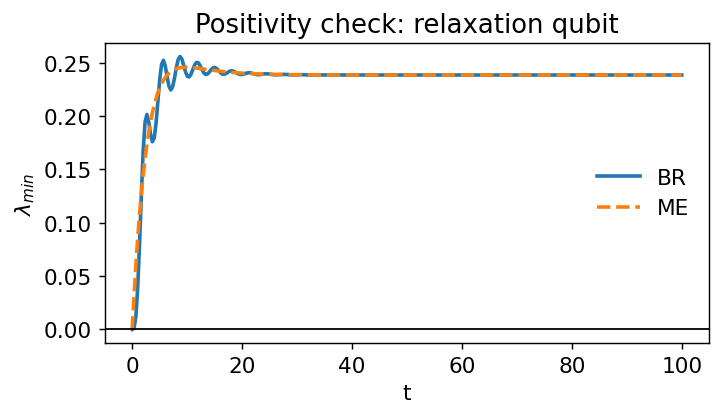

In [2]:

plt.figure(figsize=(6,3))

plt.plot(tlist,min_br,label='redfield')

plt.plot(tlist,min_me,label='linblad',ls='--')

plt.axhline(0,color='k',lw=1)

plt.xlabel('t')

plt.ylabel(r'$\lambda_{min}$')

plt.legend(frameon=False)

plt.title('Positivity check: relaxation qubit')

plt.show()

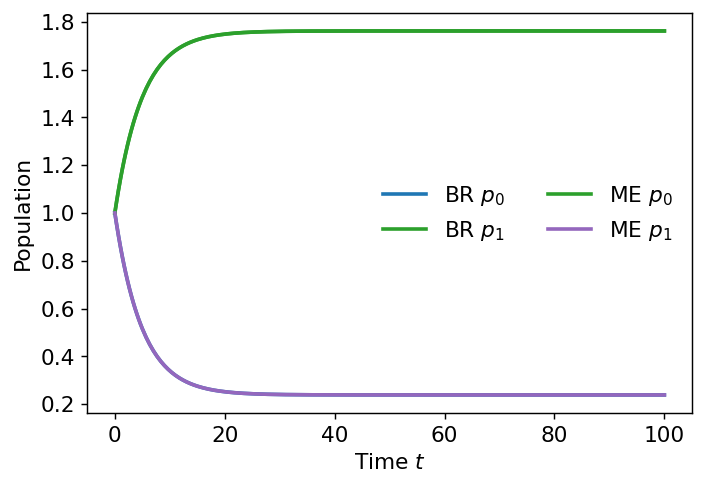

In [3]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_populations(tlist, res_br.states, ax=ax, labels=["redfield $p_0$", "redfield $p_1$"])
plot_populations(tlist, res_me.states, ax=ax, labels=["linblad $p_0$", "linblad $p_1$"])
plt.show()

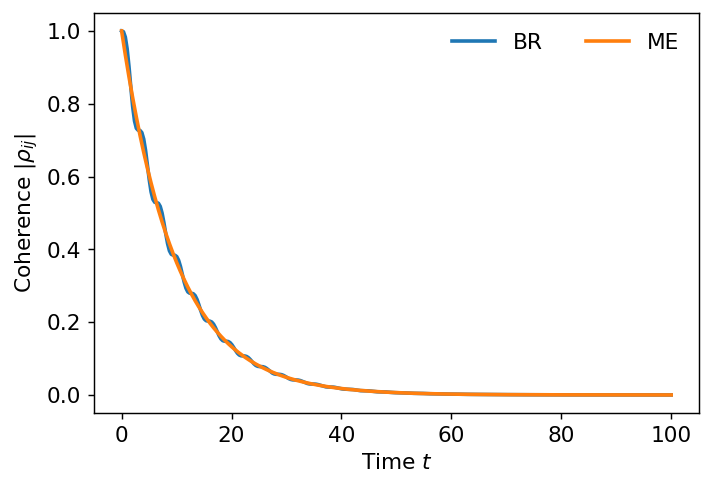

In [4]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_coherences(tlist, res_br.states, ax=ax, labels=["redfield"])
plot_coherences(tlist, res_me.states, ax=ax, labels=["linblad"])
plt.show()